# Deep Learning for Computer Vision:  Assignment 1


## Computer Science: COMS W 4995 006


### Due: February 13, 2018

#### Problem 1

You are asked to produce a minumum error rate classifier for a 3-class classification problem. Your feature space is 2-dimensional. Let's say the class conditional density functions (or likelihoods) are known and given by $\rho({\bf x}|y_i)$
where ${\bf x}$ is your feature and $y_i$ specifies the class. Let's also assume that the priors $P(y_i)$ are also given. (Both of these are specified below.) Show the decision regions for each of the three classes. Hint: you can show this by densely generating sample points ${\bf x}_j \in X$ in the feature space, classifying them, and then plotting and coloring them according to their predicted label.

Let the ccds and priors be given as:
    

$$\rho({\bf x}|y_1) \sim N({\bf \mu}_1, \Sigma_1)  \text{ and } P(y_1) = 0.5\,\, \text{ where } \,\, 
{\bf \mu}_1 = \left[\begin{array}{c} 1 \\ 1  \end{array} \right]
\,\, \text{ and } 
\Sigma_1 = \left[\begin{array}{cc} 1 & 0 \\ 0 & 0.5  \end{array} \right] $$


$$\rho({\bf x}|y_2) \sim N({\bf \mu}_2, \Sigma_2)  \text{ and } P(y_2) = 0.4\,\, \text{ where } \,\, 
{\bf \mu}_2 = \left[\begin{array}{c} 1 \\ 0  \end{array} \right]
\,\, \text{ and } 
\Sigma_2 = \left[\begin{array}{cc} 0.5 & 0 \\ 0 & 1  \end{array} \right] $$


$$\rho({\bf x}|y_3) \sim N({\bf \mu}_3, \Sigma_3)  \text{ and } P(y_3) = 0.1\,\, \text{ where } \,\, 
{\bf \mu}_3 = \left[\begin{array}{c} 0 \\ -1  \end{array} \right]
\,\, \text{ and } 
\Sigma_3 = \left[\begin{array}{cc} 2.0 & 0 \\ 0 & 0.5  \end{array} \right] $$

Remember all you need to do is to use Bayes theorem to get the expression for $P(y_i|{\bf x})$, then for each sample ${\bf x}_j \in X$ choose the $i$ with the highest aposteriori probability. Do not use any statisical packages to do this other than numpy.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

## Densly generate random samples from the GAUSSIAN disributions

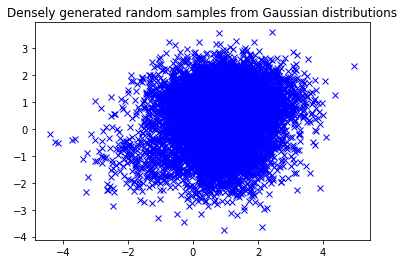

In [3]:
mu1 = np.array([1, 1])
mu2 = np.array([1, 0])
mu3 = np.array([0, -1])

cov1 = np.array([[1, 0], [0, 0.5]])
cov2 = np.array([[0.5, 0], [0, 1]])
cov3 = np.array([[2.0, 0], [0, 0.5]])

unit = 10000
data1 = np.random.multivariate_normal(mu1, cov1, int(0.5 * unit)).T
data2 = np.random.multivariate_normal(mu2, cov2, int(0.4 * unit)).T
data3 = np.random.multivariate_normal(mu3, cov3, int(0.1 * unit)).T

data = np.concatenate((data1, data2, data3), axis=1)
plt.plot(data[0, :], data[1, :], "xb")
plt.title("Densely generated random samples from Gaussian distributions")
plt.show()

## Predict sample labels based on Bayes Classifier

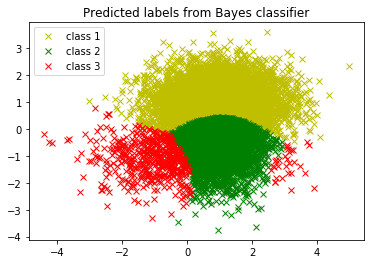

In [4]:
def multivariate_normal(x, mu, cov):
    return (np.exp(-1/2*(x - mu).T.dot(np.linalg.inv(cov)).dot(x-mu))) / np.sqrt((2*np.pi)**2 * np.linalg.det(cov))

# P[x|y] * P[y]
probabilities = np.zeros((unit, 3))
# to use this numpy function, we must make sure the fisrt argument is the numpy array
probabilities[:, 0] = np.apply_along_axis(multivariate_normal, 0, data, mu1, cov1) * 0.5
probabilities[:, 1] = np.apply_along_axis(multivariate_normal, 0, data, mu2, cov2) * 0.4
probabilities[:, 2] = np.apply_along_axis(multivariate_normal, 0, data, mu3, cov3) * 0.1

labels = np.argmax(probabilities, axis=1)
class1 = data[:, labels==0]
class2 = data[:, labels==1]
class3 = data[:, labels==2]

plt.plot(class1[0, :], class1[1, :], "yx", label="class 1")
plt.plot(class2[0, :], class2[1, :], "gx", label="class 2")
plt.plot(class3[0, :], class3[1, :], "rx", label="class 3")
plt.legend(loc='upper left')
plt.title("Predicted labels from Bayes classifier")
plt.show()

## Densely generate random samples from UNIFORM distribution

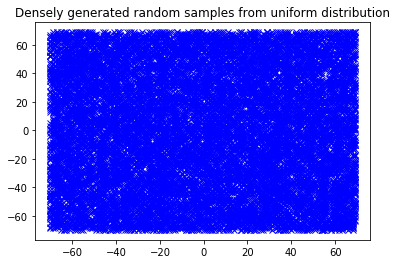

In [5]:
data_uniform = np.random.randint(-70, 70, (2, 15000))
plt.plot(data_uniform[0, :], data_uniform[1, :], "bx")
plt.title("Densely generated random samples from uniform distribution")
plt.show()

## Predict sample labels based on Bayes Classifier

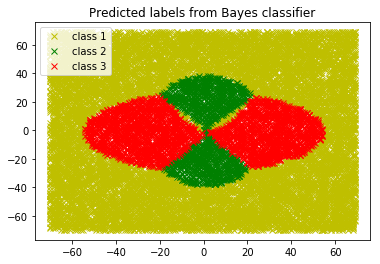

In [6]:
probabilities = np.zeros((15000, 3))
probabilities[:, 0] = np.apply_along_axis(multivariate_normal, 0, data_uniform, mu1, cov1) * 0.5
probabilities[:, 1] = np.apply_along_axis(multivariate_normal, 0, data_uniform, mu2, cov2) * 0.4
probabilities[:, 2] = np.apply_along_axis(multivariate_normal, 0, data_uniform, mu3, cov3) * 0.1

labels = np.argmax(probabilities, axis=1)
class1 = data_uniform[:, labels==0]
class2 = data_uniform[:, labels==1]
class3 = data_uniform[:, labels==2]

plt.plot(class1[0, :], class1[1, :], "yx", label="class 1")
plt.plot(class2[0, :], class2[1, :], "gx", label="class 2")
plt.plot(class3[0, :], class3[1, :], "rx", label="class 3")
plt.legend(loc='upper left')
plt.title("Predicted labels from Bayes classifier")
plt.show()

#### Problem 2

Implement the Pegasos algorithm for finding a linear SVM classifier which separates the training data generated below. Experiment with three different choices for the regularization parameter and plot the resulting separating plane. Explain how the choice of C effects the resulting solution. Hint: the algorithm might show better convergence if you use the projection normalization step. Also, you can consult with any literature beyond the course notes, but you must write your own code.

In [289]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [290]:
# Let's make up some random data to use to build our SVM classifier
data = pd.DataFrame(np.zeros((500, 3)), columns=['x1', 'x2', 'y'])

for i in range(len(data.index)):
    x1 = random.randint(20,100)
    if np.random.random() > 0.5:
        data.iloc[i,0] = 1.0 * x1 
        data.iloc[i,1] = 0.25 * x1 + 50.0 * (random.random() - 0.5) + 65.0
        data.iloc[i,2] = 1.0
    else:
        data.iloc[i,0] = 1.0 * x1
        data.iloc[i,1] = 0.24 * x1 + 50.0 * (random.random() - 0.5) + 0.0 
        data.iloc[i,2] = -1.0
    
# Add in a stray point
data.iloc[0,0] = 50.0
data.iloc[0,1] = 0.25 * x1 + 25.0
data.iloc[0,2] = 1.0

# Now let's normalize this data.

data.iloc[:,0] = (data.iloc[:,0] - data['x1'].mean()) / data['x1'].std()
data.iloc[:,1] = (data.iloc[:,1] - data['x2'].mean()) / data['x2'].std()

data.head()
data.describe()

,x1,x2,y
count,5.000000e+02,5.000000e+02,500.000000
mean,-1.154632e-17,3.423928e-16,0.004000
std,1.000000e+00,1.000000e+00,1.000993
min,-1.722606e+00,-1.804586e+00,-1.000000
25%,-9.497902e-01,-9.105485e-01,-1.000000
50%,1.622912e-02,2.081704e-02,1.000000
75%,8.534459e-01,9.106660e-01,1.000000
max,1.712130e+00,1.806752e+00,1.000000


In [291]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

X = np.matrix(X.values)
y = np.matrix(y.values)

In [292]:
# Sloppy function for plotting our data
def plot_data(X, y, w=None):
    
    fig, ax = plt.subplots(figsize=(12,8))
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

    y_predict = y > 0
    indices_0 = [k for k in range(0, X.shape[0]) if not y_predict[k]]
    indices_1 = [k for k in range(0, X.shape[0]) if y_predict[k]]

    ax.plot(X[indices_0, 0], X[indices_0,1], marker='o', linestyle='', ms=5, label='-1')
    ax.plot(X[indices_1, 0], X[indices_1,1], marker='o', linestyle='', ms=5, label='1')
    if w is None:
        pass
    else:
        T = np.zeros((2, 2))
        # x1
        T[0, :] = np.array([-2, 2])
        # x2
        T[1, :] = np.apply_along_axis(find_x2, 0, T[0, :], w)
        ax.plot(T[0, :], T[1, :], "r-", T[0, :], T[1, :], "ro")

    ax.legend()
    ax.legend(loc=2)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title('Training Data')
    plt.show()
    
def find_x2(x1, w):
    return (-w[2] - w[0]*x1) / w[1]

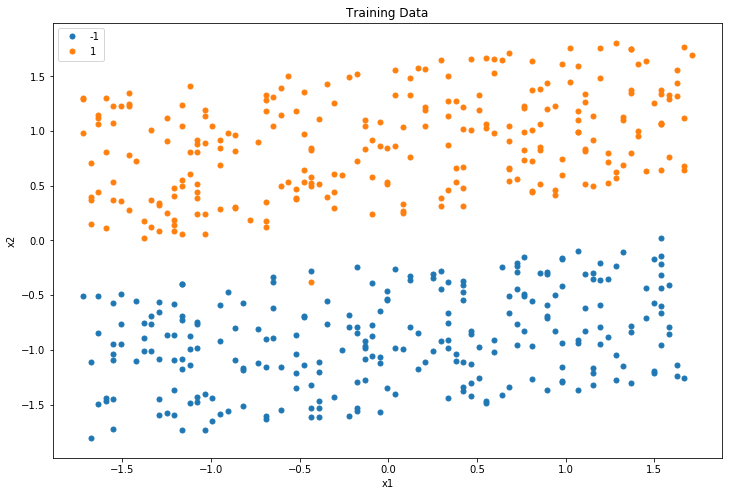

In [293]:
plot_data(X,y)

In [304]:
# append 1 to the end of each data point to consider b
X_ = X.A
y_ = y.A
X_ = np.concatenate((X_, np.ones((500, 1))), axis=1)

def pegasos(X, y, C, T):
    lam = 2.0/(X.shape[0]*C)
    print("C = {}, lam = {}".format(C, lam))
    w = np.zeros(3)
    for t in range(1, T+1):
        w_old = w
        i = np.random.randint(0, X.shape[0])
        x = X[i, :]
        eta = 1/(lam * t)
        if y[i]*(w.dot(x)) < 1:
            w = (1 - eta*lam)*w + eta*y[i]*x
        else:
            w = (1 - eta*lam)*w
        w = np.minimum(1, (1/np.sqrt(lam))/np.linalg.norm(w)) * w
    return w

## C = 1, $\lambda$ = 0.04

C = 1, lam = 0.004


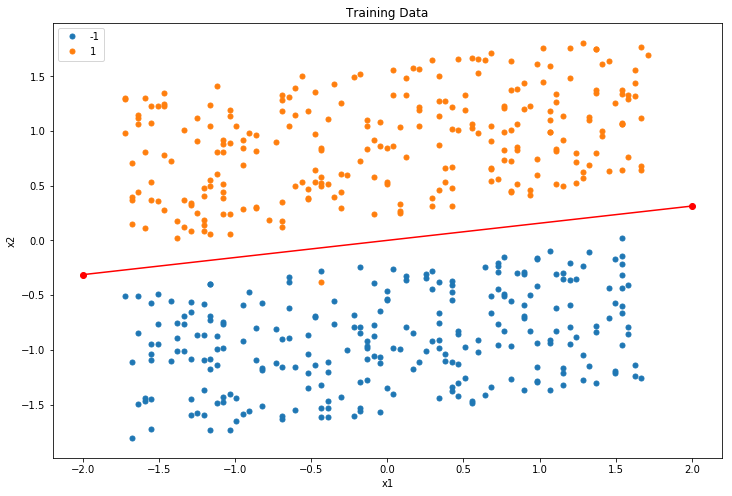

In [305]:
w = pegasos(X_, y_, 1, 100000)
plot_data(X, y, w)

## C = 100, $\lambda$ = $4 \times 10^{-5}$

C = 100, lam = 4e-05


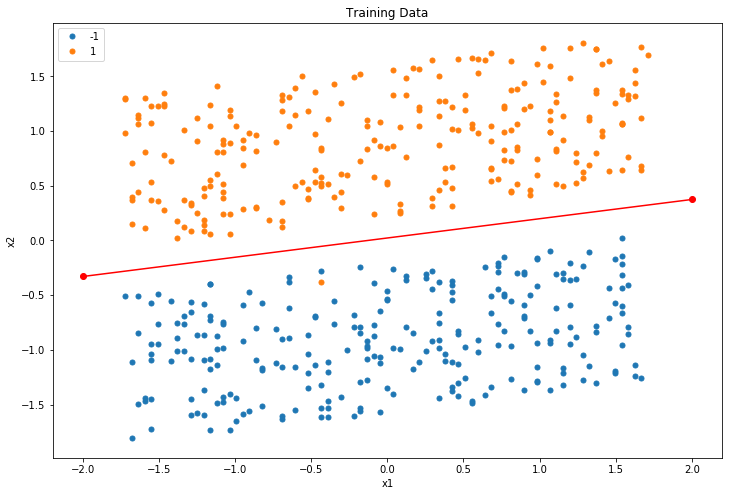

In [306]:
w = pegasos(X_, y_, 100, 100000)
plot_data(X, y, w)

## C = 10000, $\lambda$ = $4 \times 10^{-7}$ 

C = 10000, lam = 4e-07


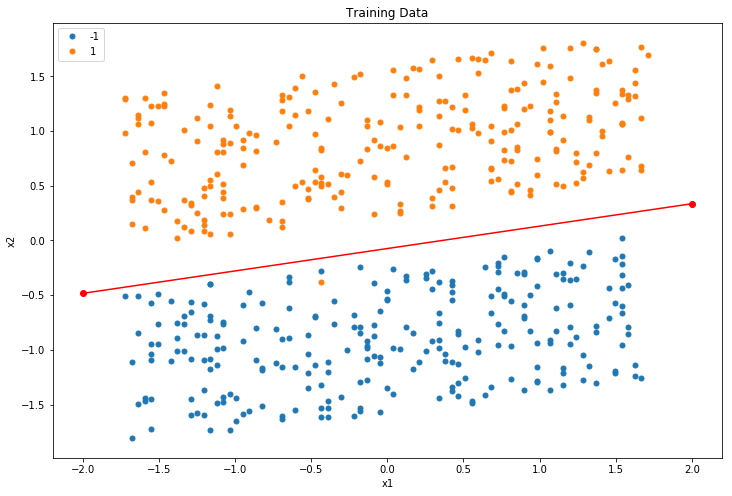

In [308]:
w = pegasos(X_, y_, 10000, 100000)
plot_data(X, y, w)

### The parameter $C$ balances the optimization over loss and the regularization over $w$. 

### If $C$ is large (like $10000$ above), then $\lambda$ is small ($\lambda = \frac{2}{NC}$), which means we need to focus more on reducing loss than regularization. Thus, the function will try to be correct on every point and care less about regularization. That is why the margin learned by model with large $C$ is not very good. If we set $C$ to be extremely large (like $100000000$), then the algorithm will learn a very bad boundary whose direction fully depends on the last random sample the algorithm sees, because it will spare no effort to make every sample correct.

### If $C$ is small (like $1$ above), then $\lambda$ is large, and the learner will focus more on regularization than reducing loss caused by single samples. We will tend to learn a more generalized boundary which has a better margin, whose performance is not affected by one or two incorrect samples (like the yellow dot which appears inside the group of blue dots).